# Digit recognizer SVM

### Initial setup

In [2]:
# load necessary libraries
import numpy as np
import pandas as pd
from sklearn import svm
import matplotlib.pyplot as plt

In [3]:
# load the data
train_data = pd.read_csv("../data/train.csv")
test_data = pd.read_csv("../data/test.csv")

### Taking a look at the data

In [4]:
# take a peek
print(train_data.shape)
print(test_data.shape)

(42000, 785)
(28000, 784)


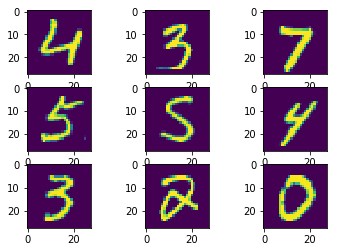

In [5]:
# plot a few digits.
# copied this code from https://www.kaggle.com/uysimty/digit-recognize-with-sklearn
def show_image(train_image, index):
    image_shaped = train_image.values.reshape(28,28)
    plt.subplot(3, 3, index+1)
    plt.imshow(image_shaped)

images_pixels = train_data.drop(columns=['label'])
sample_image = images_pixels.sample(9).reset_index(drop=True)
for index, image_pixels in sample_image.iterrows():
    show_image(image_pixels, index)

In [6]:
# first column of training data is the label. remaining columns give pixel intensity from 0 to 255
print(train_data.columns[0:4])

Index(['label', 'pixel0', 'pixel1', 'pixel2'], dtype='object')


In [7]:
# frequency of the different digits
pd.DataFrame(train_data.label.value_counts()).sort_index()

,label
0,4132
1,4684
2,4177
3,4351
4,4072
5,3795
6,4137
7,4401
8,4063
9,4188


(32928000, 1)


(array([27182695.,   399808.,   359330.,   306344.,   312800.,   352749.,
          328661.,   362706.,   427725.,  2895182.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

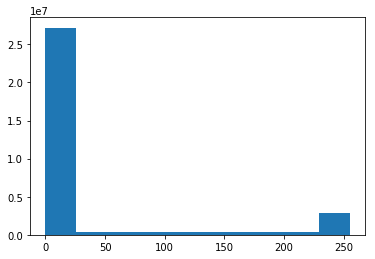

In [8]:
# distribution of pixel intensity
# create a single series with all the pixel values
pixels = train_data.copy().drop('label',1)
pixelArray = np.reshape(np.array(pixels), (42000*784,1))
print(pixelArray.shape)
plt.hist(pixelArray)

(array([439.,  52.,  40.,  34.,  27.,  41.,  50.,  44.,  37.,  21.]),
 array([  0.        ,  13.98261429,  27.96522857,  41.94784286,
         55.93045714,  69.91307143,  83.89568571,  97.8783    ,
        111.86091429, 125.84352857, 139.82614286]),
 <a list of 10 Patch objects>)

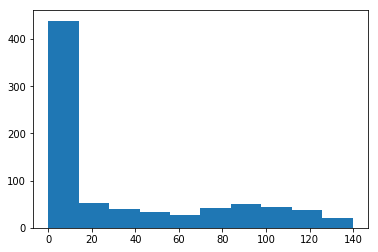

In [9]:
# calculate mean intensity by pixel
train_data.columns[0:5]
pixelMeans = train_data.mean(axis=0)
plt.hist(pixelMeans)

In [10]:
# average intensity by label
# first create a column of the sums, then group by label and take average
train_data_nolabel = train_data.copy().drop('label',1)
train_data['pixelSum'] = train_data_nolabel.sum(axis=1)
label_means = train_data.groupby('label').mean()
print(label_means['pixelSum'])

label
0    34632.407551
1    15188.466268
2    29871.099354
3    28320.188003
4    24232.722495
5    25835.920422
6    27734.917331
7    22931.244263
8    30184.148413
9    24553.750000
Name: pixelSum, dtype: float64


In [11]:
# fit an SVM using the pixel intensity
clf=svm.SVC()

In [12]:
X = train_data['pixelSum'].values.reshape(-1,1)
Y = train_data['label'].tolist()

In [13]:
clf.fit(X, Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [15]:
# predictions from the model (i.e. fitted values)
Y_hat = clf.predict(X)

In [18]:
# what portion of the predictions are correct?
np.sum(Y_hat==Y) / len(Y)

0.643095238095238